# 제 1 유형

> 데이터
* https://www.kagle.com/anmolkumar/health-insurance-cross-sell-prediction
* 자동차 보험 가입 예측

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")

## Q1.
> Vehicle_Age 값이 2년 이상인 사람들만 필터링하고 그중에서 Annual_Premium 값이 전체 데이터의 중간값 이상인 사람들을 찾고, 그들의 Vintage값의 평균을 구하여라.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Annual_Premium        304887 non-null  float64
 9   Policy_Sales_Channel  304887 non-null  float64
 10  Vintage               304887 non-null  int64  
 11  Response              304887 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.9+ MB


In [ ]:
df["Vehicle_Age"].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [ ]:
over_2y = df[df["Vehicle_Age"] == "> 2 Years"]
over_2y[over_2y["Annual_Premium"] >= over_2y["Annual_Premium"].median()]["Vintage"].mean()

154.55906743858552

## Q2.
> Vehicle_Age에 따른 각 성별(Gender)그룹의 Annual_Premium값의 평균을 구하여 아래 테이블과 동일하게 구현하라.

In [ ]:
df.groupby(["Vehicle_Age", "Gender"], as_index=False).agg({"Annual_Premium": pd.Series.mean}).pivot(index="Vehicle_Age", columns="Gender", values="Annual_Premium")

Gender,Female,Male
Vehicle_Age,,
1-2 Year,30762.245001,30413.088469
< 1 Year,29972.286702,30310.982212
> 2 Years,36108.366374,35303.870627


# 제 2 유형

> 데이터
* https://www.kaggle.com/ronitf/heart-disease-uci
* 심장질환예측
* 평가지표: f1-score

In [1]:
import pandas as pd

train_df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/test.csv")
submission_df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/submission.csv")

## 데이터 탐색

In [2]:
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
1,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
2,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
3,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
238,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
239,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
240,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


In [5]:
print(train_df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


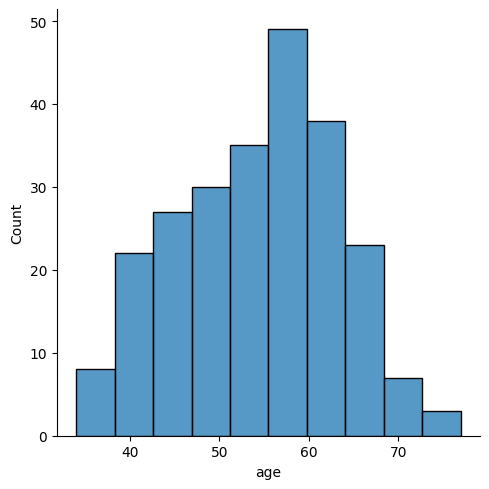

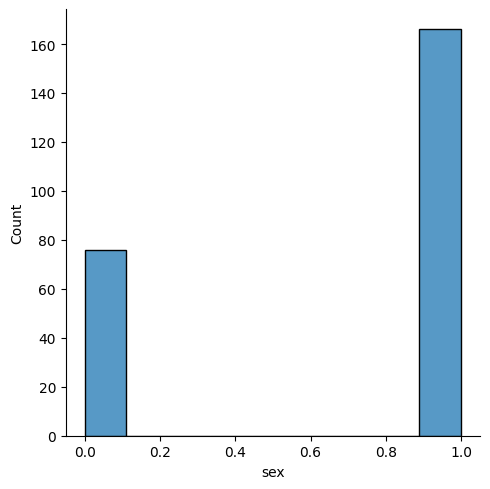

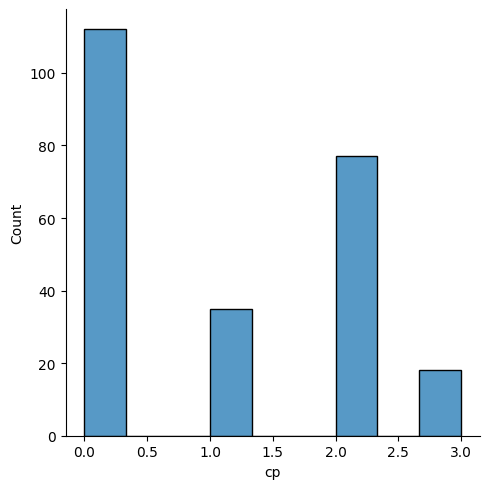

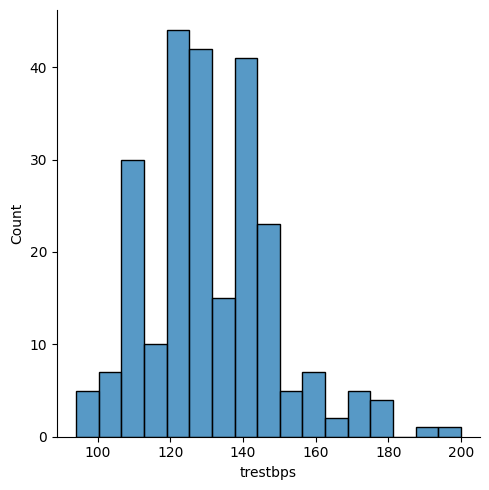

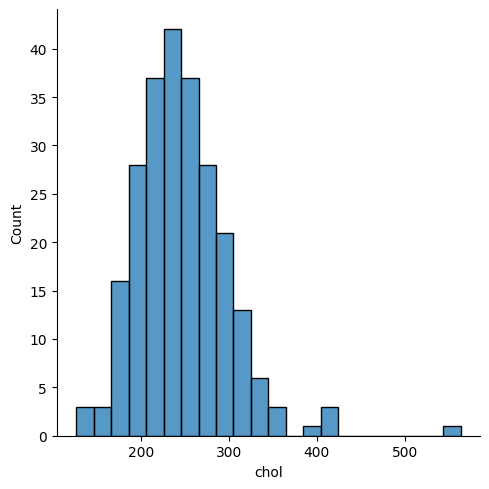

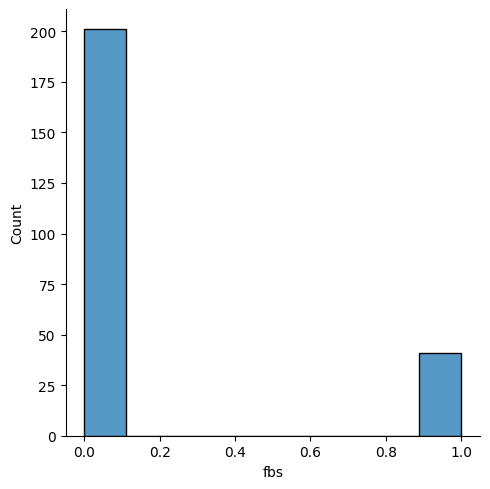

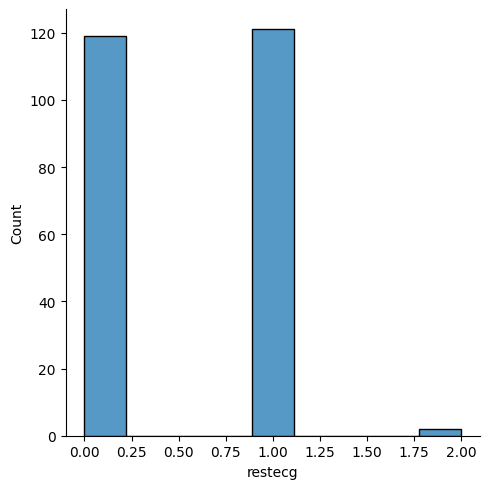

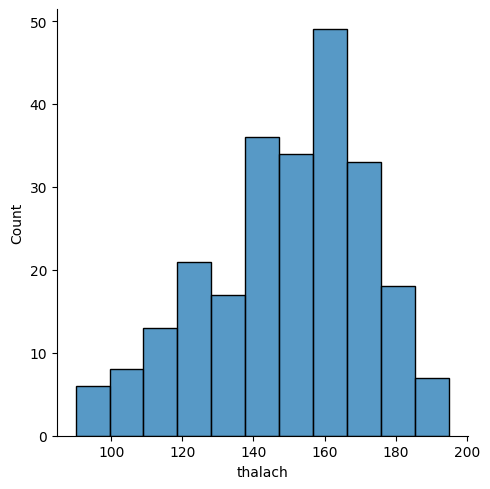

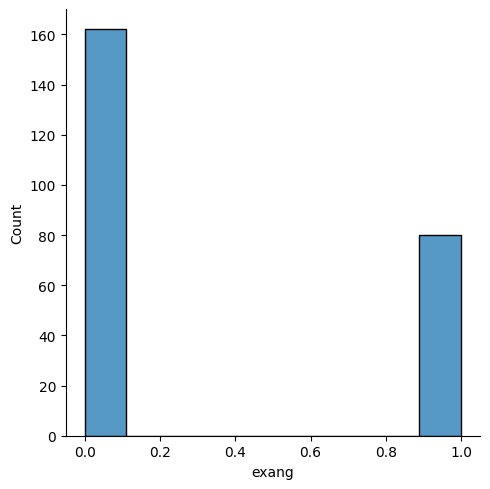

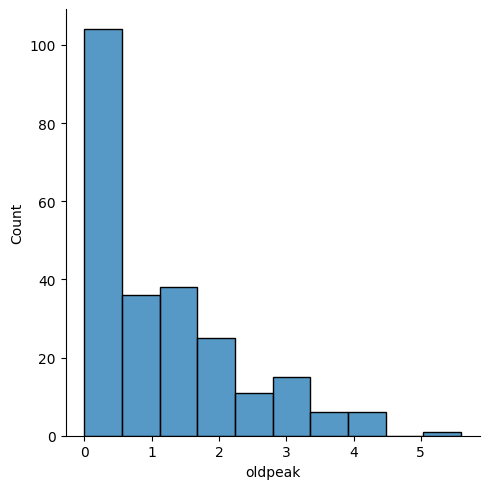

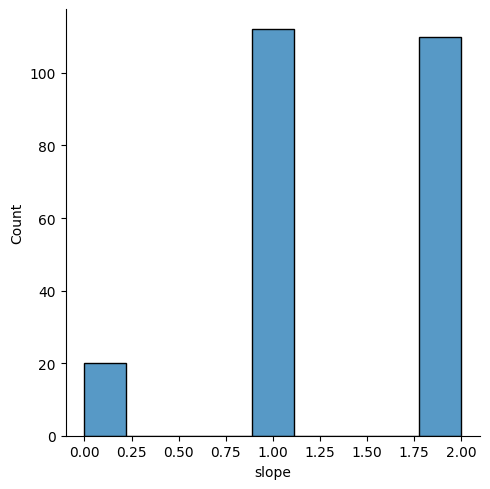

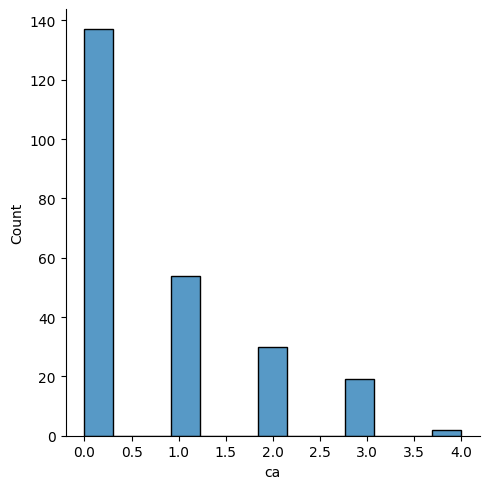

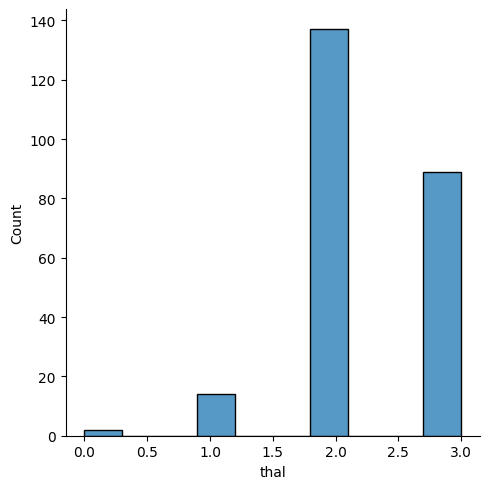

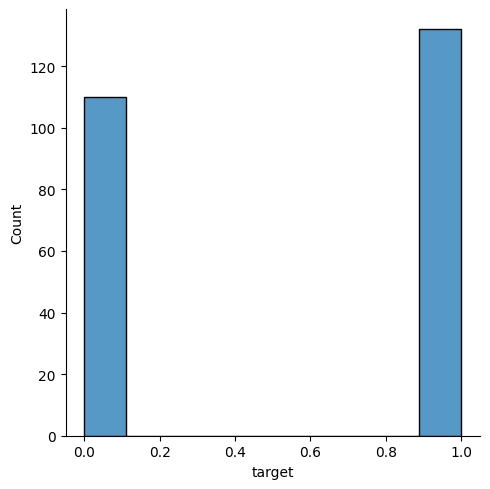

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in train_df.columns:
    sns.displot(train_df,
                x=col)
    plt.show()

## 전처리 함수 작성

In [7]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
1,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
2,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
3,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0


In [8]:
from sklearn.preprocessing import StandardScaler

def my_preprocess(org_df, target="train", scalers=None):
    df = org_df.copy()
    if target == "train":
        scaler1 = StandardScaler()
        df = scaler1.fit_transform(df)
        return df, scaler1
    elif target == "test":
        scaler1 = scalers
        df = scaler1.transform(df)
        return df

## 독립 / 종속변수 분할, 검증데이터셋 분할

In [17]:
from sklearn.model_selection import train_test_split

X = train_df.drop("target", axis=1)
y = train_df["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

## 전처리 시행

In [18]:
X_train_proc, scalers = my_preprocess(X_train, target="train", scalers=None)
X_val_proc = my_preprocess(X_val, target="test", scalers=scalers)
test_proc = my_preprocess(test_df, target="test", scalers=scalers)

print(X_train_proc.shape)
print(X_val_proc.shape)
print(test_proc.shape)

(193, 13)
(49, 13)
(61, 13)


## 분석

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf

from sklearn.metrics import f1_score, confusion_matrix

### 로지스틱 회귀

In [23]:
model_lr = LogisticRegression()
model_lr.fit(X_train_proc, y_train)
pred = model_lr.predict(X_val_proc)

f1_lr = f1_score(y_val, pred)
f1_lr

0.8518518518518519

In [20]:
confusion_matrix(y_val, pred)

array([[18,  4],
       [ 4, 23]])

### 랜덤포레스트

In [22]:
scores = []
for i in range(2, 11):
    model_rf = RandomForestClassifier(max_depth=i, random_state=5)
    model_rf.fit(X_train_proc, y_train)
    pred = model_rf.predict(X_val_proc)
    scores.append(f1_score(y_val, pred))
pd.DataFrame(scores, index=range(2, 11), columns=["f1"]).sort_values("f1", ascending=False)

,f1
2,0.892857
3,0.872727
4,0.851852
8,0.851852
9,0.851852
5,0.830189
6,0.830189
7,0.807692
10,0.807692


In [24]:
model_rf = RandomForestClassifier(max_depth=2, random_state=5)
model_rf.fit(X_train_proc, y_train)
pred = model_rf.predict(X_val_proc)

f1_rf = f1_score(y_val, pred)
f1_rf

0.8928571428571429

In [25]:
confusion_matrix(y_val, pred)

array([[18,  4],
       [ 2, 25]])

### AdaBoost

In [26]:
model_ab = AdaBoostClassifier(random_state=5)
model_ab.fit(X_train_proc, y_train)
pred = model_ab.predict(X_val_proc)

f1_ab = f1_score(y_val, pred)
f1_ab

0.7719298245614035

In [27]:
confusion_matrix(y_val, pred)

array([[14,  8],
       [ 5, 22]])

### XGBoost

In [34]:
model_xgb = XGBClassifier(max_depth=2)
model_xgb.fit(X_train_proc, y_train)
pred = model_xgb.predict(X_val_proc)

f1_xgb = f1_score(y_val, pred)
f1_xgb

0.8771929824561403

In [35]:
confusion_matrix(y_val, pred)

array([[17,  5],
       [ 2, 25]])

### KNN

In [36]:
scores = []
for i in range(1, 36, 2):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train_proc, y_train)
    pred = model_knn.predict(X_val_proc)
    scores.append(f1_score(y_val, pred))
pd.DataFrame(scores, index=range(1, 36, 2), columns=["f1"]).sort_values("f1", ascending=False)

,f1
5,0.909091
35,0.896552
25,0.896552
33,0.896552
31,0.896552
3,0.892857
7,0.888889
9,0.888889
29,0.877193
27,0.877193


In [38]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_proc, y_train)
pred = model_knn.predict(X_val_proc)

f1_knn = f1_score(y_val, pred)
f1_knn

0.9090909090909091

In [39]:
confusion_matrix(y_val, pred)

array([[19,  3],
       [ 2, 25]])

### SVM

In [52]:
model_svm = SVC(kernel="linear", C=0.01, random_state=5)
model_svm.fit(X_train_proc, y_train)
pred = model_svm.predict(X_val_proc)

f1_svm = f1_score(y_val, pred)
f1_svm

0.896551724137931

In [53]:
confusion_matrix(y_val, pred)

array([[17,  5],
       [ 1, 26]])

### ANN

In [60]:
model_ann = tf.keras.models.Sequential()
model_ann.add(tf.keras.layers.Dense(units=64, activation="relu"))
model_ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model_ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ann.fit(X_train_proc, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10))

Epoch 1/100
5/5 [==============================] - 1s 45ms/step - loss: 0.7181 - accuracy: 0.4416 - val_loss: 0.6536 - val_accuracy: 0.6923
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6730 - accuracy: 0.6104 - val_loss: 0.6152 - val_accuracy: 0.7949
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6336 - accuracy: 0.7208 - val_loss: 0.5795 - val_accuracy: 0.8462
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6001 - accuracy: 0.7597 - val_loss: 0.5480 - val_accuracy: 0.8974
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5708 - accuracy: 0.7987 - val_loss: 0.5197 - val_accuracy: 0.9231
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5441 - accuracy: 0.8117 - val_loss: 0.4949 - val_accuracy: 0.9231
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5222 - accuracy: 0.8117 - val_loss: 0.4723 - val_accuracy: 0.9231
Epoch 8/100
5/5 [===

In [63]:
pred = model_ann.predict(X_val_proc).round()

f1_ann = f1_score(y_val, pred)
f1_ann

2/2 [==============================] - 0s 10ms/step


0.8363636363636364

In [64]:
confusion_matrix(y_val, pred)

array([[17,  5],
       [ 4, 23]])

## KNN 의 성능이 가장 좋음

In [65]:
test_pred = model_knn.predict(test_proc)

submission_df["0"] = test_pred
submission_df.to_csv("submission_pred.csv")